Linear regression

m = [1.93939394]
b = [4.73333333]


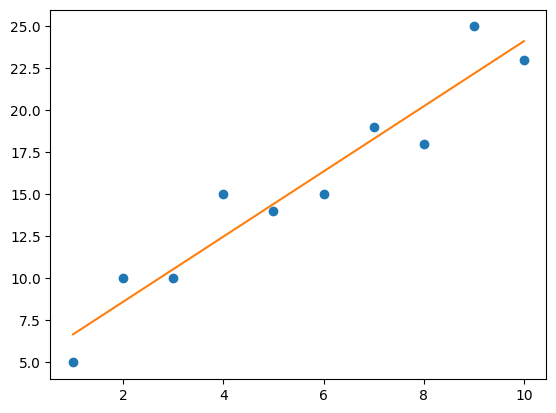

In [8]:
# Using scikit-learn to do a simple linear regression
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Import data points
df = pd.read_csv('https://bit.ly/3goOAnt', delimiter=',')

# Extract input variables(features) - all rows, all columns but the last
X = df.values[:, :-1]

# Extract output column (target variable) - all rows, last column
Y = df.values[:, -1]

# Fit a line to the points
fit = LinearRegression().fit(X, Y)

# Display coefficients m and b (beta1, beta0)
m = fit.coef_.flatten()
b = fit.intercept_.flatten()
print(f'm = {m}')
print(f'b = {b}')

# Display visually
plt.plot(X, Y, 'o')
plt.plot(X, m*X+b)
plt.show()

What defines a “best fit”?
* we minimize the squares, or more specifically the sum of the squared residuals.
* The residual is the numeric difference between the line and the points

In [10]:
# Calculating the residuals for a given line and data

import pandas as pd 

# Import points
points = pd.read_csv('https://bit.ly/3goOAnt', delimiter=",").itertuples()

# Test with a given line
m = 1.93939
b = 4.73333

sum_of_squares = 0.0

# Calculate the residuals
for p in points: 
    y_actual = p.y
    y_predict = m*p.x + b
    residual = y_actual - y_predict 
    print(residual)
    residual_squared = (y_predict - y_actual)**2
    sum_of_squares += residual_squared

print(f"\nsum of squares = {sum_of_squares}")

-1.67272
1.3878900000000005
-0.5515000000000008
2.5091099999999997
-0.4302799999999998
-1.3696699999999993
0.6909400000000012
-2.2484499999999983
2.812160000000002
-1.1272299999999973

sum of squares = 28.096969704500005


### Finding the Best Fit Line - algos, without scikit-learn

Closed Form Equation - formula based, works only for one input, does not scale well.

Inverse Matrix - when we have more than one input var, has problems with scaling and stability on large datasets.

In [13]:
# Using inverse and transposed matrices to fit a linear regression

import pandas as pd
from numpy.linalg import inv
import numpy as np

# Import points
df = pd.read_csv('https://bit.ly/3goOAnt', delimiter=",")

# Extract input variables (all rows, all columns but last column)
X = df.values[:, :-1].flatten()

# Add placeholder "1" column to generate intercept - beta0 or b
X_1 = np.vstack([X, np.ones(len(X))]).T

# Extract output column (all rows, last column)
Y = df.values[:, -1]

# Calculate coefficents for slope and intercept
b = inv(X_1.transpose() @ X_1) @ (X_1.transpose() @ Y) 
print(f'Coefficeints: \n{b}') # [1.93939394, 4.73333333]

# Predict against the y-values
y_predict = X_1.dot(b)
print(f"\nPredicted y values: \n{y_predict}")

Coefficeints: 
[1.93939394 4.73333333]

Predicted y values: 
[ 6.67272727  8.61212121 10.55151515 12.49090909 14.43030303 16.36969697
 18.30909091 20.24848485 22.18787879 24.12727273]


QR decomposition - better performance and computational stability on large data, used by many scientific libs.

In [18]:
# Using QR decomposition to perform a linear regression

import pandas as pd
from numpy.linalg import qr, inv
import numpy as np

# Import points
df = pd.read_csv('https://bit.ly/3goOAnt', delimiter=",")

# Extract input variables (all rows, all columns but last column)
X = df.values[:, :-1].flatten()

# Add placeholder "1" column to generate intercept
X_1 = np.vstack([X, np.ones(len(X))]).transpose() 

# Extract output column (all rows, last column)
Y = df.values[:, -1]

# calculate coefficents for slope and intercept using QR decomposition
Q, R = qr(X_1)
b = inv(R).dot(Q.transpose()).dot(Y)

print(b) # [1.93939394, 4.73333333]

[1.93939394 4.73333333]


Hill climbing - An optimisation algorithm used in linear programming. We randomly adjust beta coefficients (m and b) by adding random values from a standard normal distribution. If the sum of squares improves, we keep adjustments, otherwise revert. Doing this for a fixed number of iterations. Initial sum of squares is set to a large value. Not computationally efficient. See the code in the video.

Gradient Descent
* Gradient descent is an optimization technique that uses derivatives and iterations to minimize/maximize a set of parameters against an objective.

In [19]:
# Calculating partial derivatives for m and b off our loss function

from sympy import *

m, b, i, n = symbols('m b i n')
x, y = symbols('x y', cls=Function)

sum_of_squares = Sum((m*x(i) + b - y(i)) ** 2, (i, 0, n))

d_m = diff(sum_of_squares, m)
d_b = diff(sum_of_squares, b)

print(d_m) 
print(d_b)

Sum(2*(b + m*x(i) - y(i))*x(i), (i, 0, n))
Sum(2*b + 2*m*x(i) - 2*y(i), (i, 0, n))


In [48]:
# Performing gradient descent for a linear regression

import pandas as pd

# Import points from CSV
points = list(pd.read_csv("https://bit.ly/2KF29Bd").itertuples())

# Building the model
m=-1000.0
b=-1000.0

# The learning Rate
L=.001

# The number of iterations
iterations = 100_000

# n = float(len(points)) # Number of elements in X

# Perform Gradient Descent
for i in range(iterations): 
    
    # slope with respect to m
    D_m = sum(2*p.x*((m*p.x+b)-p.y) for p in points)
    
    # slope with respect to b
    D_b = sum(2*((m*p.x+b)-p.y) for p in points)
    
    # Display what is going on with our variables
    if i in (0, 1, 2, 3, 4, 5) or i % 10_000 == 0:
        print(f'Iteration {i}')
        print(f'm {m}, b {b}, D_m {D_m}, D_b {D_b}')

    # update m and b
    m -= L * D_m
    b -= L * D_b

print(f"y = {m}x + {b}")

Iteration 0
m -1000.0, b -1000.0, D_m -882014.0, D_b -130308.0
Iteration 1
m -117.98599999999999, b -869.692, D_m -188529.33999999997, D_b -30680.300000000003
Iteration 2
m 70.54333999999997, b -839.0117, D_m -39986.915200000025, D_b -9328.466600000003
Iteration 3
m 110.5302552, b -829.6832334000001, D_m -8170.859170000003, D_b -4743.336596000001
Iteration 4
m 118.70111437, b -824.9398968040001, D_m -1357.530583540014, D_b -3749.6753553800027
Iteration 5
m 120.05864495354001, b -821.1902214486202, D_m 100.2322548775901, D_b -3525.3534840830034
Iteration 10000
m 1.9393939393939548, b 4.733333333333227, D_m 1.1013412404281553e-13, D_b -4.405364961712621e-13
Iteration 20000
m 1.9393939393939548, b 4.733333333333227, D_m 1.1013412404281553e-13, D_b -4.405364961712621e-13
Iteration 30000
m 1.9393939393939548, b 4.733333333333227, D_m 1.1013412404281553e-13, D_b -4.405364961712621e-13
Iteration 40000
m 1.9393939393939548, b 4.733333333333227, D_m 1.1013412404281553e-13, D_b -4.40536496171262

In [49]:
points

[Pandas(Index=0, x=1, y=5),
 Pandas(Index=1, x=2, y=10),
 Pandas(Index=2, x=3, y=10),
 Pandas(Index=3, x=4, y=15),
 Pandas(Index=4, x=5, y=14),
 Pandas(Index=5, x=6, y=15),
 Pandas(Index=6, x=7, y=19),
 Pandas(Index=7, x=8, y=18),
 Pandas(Index=8, x=9, y=25),
 Pandas(Index=9, x=10, y=23)]

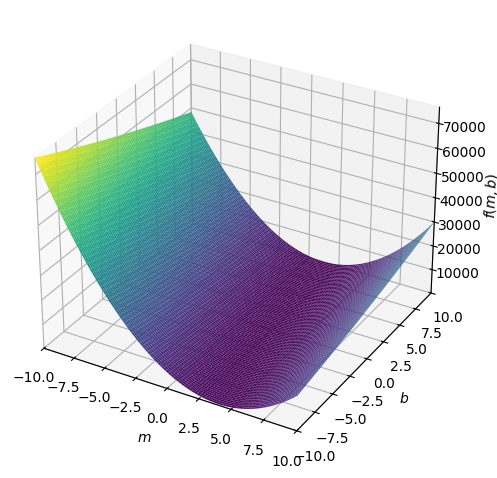

In [29]:
# Plotting the loss function for linear regression

from sympy import *
from sympy.plotting import plot3d
import pandas as pd

points = list(pd.read_csv("https://bit.ly/2KF29Bd").itertuples())

m, b, i, n = symbols('m b i n')
x, y = symbols('x y', cls=Function)

sum_of_squares = Sum((m*x(i) + b - y(i)) ** 2, (i, 0, n)) \
                .subs(n, len(points) - 1).doit() \
                .replace(x, lambda i: points[i].x) \
                .replace(y, lambda i: points[i].y)
plot3d(sum_of_squares)

Overfitting and Variance - it's always a balancing act, finding a good position between overfit and underfit.
* introducing more bias into the model by penalizing noizy/irrelevant data with Ridge and Lasso regression.

### Stochastic Gradient Descent
* train on only one sample of the dataset on each iteration. 
* In mini-batch gradient descent, multiple samples of the dataset are used (e.g., 10 or 100 data points) on each iteration.

First, it reduces computation significantly, as each iteration does not have to traverse the entire training dataset but only part of it. The second benefit is it reduces overfitting.

In [32]:
# Performing stochastic gradient descent for a linear regression
# trying to minimize the Mean Squared Error, not the Sum of Squared Errors (it is its average)

import pandas as pd
import numpy as np

# Input data
data = pd.read_csv('https://bit.ly/2KF29Bd', header=0)

X = data.iloc[:, 0].values
Y = data.iloc[:, 1].values
n = data.shape[0] # rows

# Building the model
m=0.0
b=0.0

sample_size = 1 # sample size - increase to perform mini-batch gradient descent
L = .0001 # The learning Rate
epochs = 1_000_000 # The number of iterations to perform gradient descent

# Performing Stochastic Gradient Descent
for i in range(epochs):
    idx = np.random.choice(n, sample_size, replace=False) 
    x_sample = X[idx]
    y_sample = Y[idx]
    
    # The current predicted value of Y
    Y_pred = m * x_sample + b
    
    # d/dm derivative of loss function
    D_m = (-2 / sample_size) * sum(x_sample * (y_sample - Y_pred))
    # d/db derivative of loss function
    D_b = (-2 / sample_size) * sum(y_sample - Y_pred) 
    
    m = m - L * D_m # Update m
    b = b - L * D_b # Update b
    
    # print progress
    if i % 10000 == 0: 
        print(f'Iteration {i}, m - {m}, b - {b}')
        print(f'idx {idx}, x_sample {x_sample}, y_sample {y_sample}')
        
print("y = {0}x + {1}".format(m, b))

Iteration 0, m - 0.020466666666666668, b - 0.0031333333333333335
idx [6 2 7], x_sample [7 3 8], y_sample [19 10 18]
Iteration 10000, m - 2.356672471787008, b - 1.8791031860470688
idx [5 3 8], x_sample [6 4 9], y_sample [15 15 25]
Iteration 20000, m - 2.214237104835555, b - 2.856894628429051
idx [0 7 9], x_sample [ 1  8 10], y_sample [ 5 18 23]
Iteration 30000, m - 2.12066370938021, b - 3.5130858254831034
idx [9 0 1], x_sample [10  1  2], y_sample [23  5 10]
Iteration 40000, m - 2.0474487970356146, b - 3.9380589607380707
idx [4 0 6], x_sample [5 1 7], y_sample [14  5 19]
Iteration 50000, m - 2.0132912033385693, b - 4.210865923860453
idx [3 4 2], x_sample [4 5 3], y_sample [15 14 10]
Iteration 60000, m - 1.9838073245437322, b - 4.389906944647117
idx [5 1 0], x_sample [6 2 1], y_sample [15 10  5]
Iteration 70000, m - 1.9701663262430693, b - 4.493580487263051
idx [0 8 7], x_sample [1 9 8], y_sample [ 5 25 18]
Iteration 80000, m - 1.9622639251494296, b - 4.578826347572927
idx [8 2 6], x_sam

### The Correlation Coefficient
* gives a sense for how bad the variance in the data is, and measures the residuals in aggregate. 
* If there is a strong positive-negative relationship, variables will be useful in our linear regression. If there is not a relationship, they may just add noise and hurt model accuracy.

In [33]:
# Using Pandas to see the correlation coefficient between every pair of variables

import pandas as pd

# Read data into Pandas dataframe
df = pd.read_csv('https://bit.ly/2KF29Bd', delimiter=",")

# Print correlations between variables
correlations = df.corr(method='pearson') 
print(correlations)

          x         y
x  1.000000  0.957586
y  0.957586  1.000000


### Statistical Significance

* Answers to the question - is my data correlation coincidental? 
* We are applying the ideas of hypothesis testing and p-values to linear regression.

can we be 95% sure the correlation between these two variables is significant and not coincidental?

In [35]:
# Calculating the critical value from a T-distribution

from scipy.stats import t
n=10
lower_cv = t(n-1).ppf(.025)
upper_cv = t(n-1).ppf(.975)

print(lower_cv, upper_cv)

-2.2621571628540997 2.262157162854099


If our test value happens to fall outside this range of (–2.262, 2.262), then we can reject our null hypothesis. To calculate the test value t, we need to use the following formula.

In [36]:
# Testing significance for linear-looking data

from scipy.stats import t
from math import sqrt

# sample size
n=10
lower_cv = t(n-1).ppf(.025)
upper_cv = t(n-1).ppf(.975)

# correlation coefficient
# derived from data https://bit.ly/2KF29Bd
r = 0.957586

# Perform the test
test_value = r / sqrt((1-r**2) / (n-2))
print("TEST VALUE: {}".format(test_value))
print("CRITICAL RANGE: {}, {}".format(lower_cv, upper_cv))

if test_value < lower_cv or test_value > upper_cv: 
    print("CORRELATION PROVEN, REJECT H0")
else:
    print("CORRELATION NOT PROVEN, FAILED TO REJECT H0 ")

# Calculate p-value
if test_value > 0:
    p_value = 1.0 - t(n-1).cdf(test_value)
else:
    p_value = t(n-1).cdf(test_value)

# Two-tailed, so multiply by 2
p_value = p_value * 2 
print("P-VALUE: {}".format(p_value))

TEST VALUE: 9.399564671312076
CRITICAL RANGE: -2.2621571628540997, 2.262157162854099
CORRELATION PROVEN, REJECT H0
P-VALUE: 5.9763860877914965e-06


The test value here is approximately 9.39956, which is definitely outside the range of (–2.262, 2.262) so we can reject the null hypothesis and say our correlation is real. That’s because the p-value is remarkably significant: .000005976. This is well below our .05 threshold, so this is virtually not coincidence: there is a correlation. 
* The rule is this: the more data you have that consistently resembles a line, the more significant the p-value for your correlation will be. The more scattered or sparse the data, the more the p-value will increase and thus indicate your correlation occurred by random chance.

### Coefficient of Determination
* The coefficient of determination, called r2, measures how much variation in one variable is explainable by the variation of the other variable. 
* Essentially, r2 shows how much two variables interact with each other.

In [37]:
# Creating a correlation matrix in Pandas

import pandas as pd

# Read data into Pandas dataframe
df = pd.read_csv('https://bit.ly/2KF29Bd', delimiter=",")

# Print correlations between variables
coeff_determination = df.corr(method='pearson') ** 2 
print(coeff_determination)

          x         y
x  1.000000  0.916971
y  0.916971  1.000000


* A coefficient of determination of 0.916971 is interpreted as 91.6971% of the variation in x is explained by y (and vice versa), and the remaining 8.3029% is noise caused by other uncaptured variables.

* !! correlation does not equal causation, so there could be other variables contributing to the relationship we are seeing. !!!

* E.g. my computer, or any program including scikit-learn, does not have any notion whether more water usage causes a higher bill or a higher bill causes more water usage. An AI system could easily conclude the latter, as nonsensical as that is. This is why many machine learning projects require a human in the loop to inject common sense.

### Standard Error of the Estimate
* a way to measure the overall error of a linear regression
* it is the standard deviation for a linear regression.

* We can use SSE, or sum of squared error. We learned about this earlier where we squared each residual and summed them. If y (pronounced “y-hat”) is each predicted value from the line and y represents each actual y-value from the data, than SSE = sum((y_actual - y_predicted)**2)
* as squared values are hard to interpret, we square root them and avaerage, getting standard error of the estimate (n-2 is because we need to increase uncertainty because we have 2 variables in our lin regr )

In [38]:
# Calculating the standard error of the estimate

import pandas as pd
from math import sqrt 

# Load the data
points = list(pd.read_csv('https://bit.ly/2KF29Bd', delimiter=",").itertuples())

n = len(points)

# Regression line
m = 1.939
b = 4.733

# Calculate Standard Error of Estimate
S_e = sqrt((sum((p.y - (m*p.x +b))**2 for p in points))/(n-2)) 
print(S_e)

1.87406793500129


### Prediction Intervals

* Our linear regression line also has a normal distribution running along it. Effectively, this makes each predicted y-value a sample statistic just like the mean. As a matter of fact, the “mean” is shifting along the line.

* There is a confidence interval around each y prediction, and this is known as a prediction interval. E.g. We are 95% confident that an 8.5 year old dog will have between 16.462 and 25.966 veterinary visits.

* Calculated as the margin of error and plus/minus it around the predicted y-value.

* Margin of error = t_value  * Stand_error * sqrt( 1 + 1/n + ratio)

* ratio can be in Raw-Score Form as in our example below (faster) or in Mean-Centered Form (better for precision but requires 2 full passes)

In [39]:
# Calculating a prediction interval of vet visits for a dog that’s 8.5 years old

import pandas as pd
from scipy.stats import t 
from math import sqrt

# Load the data
points = list(pd.read_csv('https://bit.ly/2KF29Bd', delimiter=",").itertuples())
n = len(points)

# Linear Regression Line
m = 1.939
b = 4.733

# Calculate Prediction Interval for x = 8.5
x_0 = 8.5
x_mean = sum(p.x for p in points) / len(points)

t_value = t(n - 2).ppf(.975)

standard_error = sqrt(sum((p.y - (m * p.x + b)) ** 2 for p in points) / (n - 2))

margin_of_error = t_value * standard_error * \
                    sqrt(1 + (1 / n) + (n * (x_0 - x_mean) ** 2) / \
                        (n * sum(p.x**2 for p in points) - \
                            sum(p.x for p in points) ** 2))

predicted_y = m * x_0 + b

# Calculate prediction interval
print(predicted_y - margin_of_error, predicted_y + margin_of_error)

16.46251687560351 25.966483124396493


* We not only create a prediction based on a linear regression (e.g., a dog that’s 8.5 years old will have 21.2145 vet visits), but we also are actually able to say something much less absolute: there’s a 95% probability an 8.5 year old dog will visit the vet between 16.46 and 25.96 times.

* it’s a much safer claim because it captures a range rather than a single value, and thus accounts for uncertainty.

### Train/Test Splits

* A basic technique machine learning practitioners use to mitigate overfitting is a practice called the train/test split, where typically 1/3 of the data is set aside for testing and the other 2/3 is used for training (other ratios can be used as well). The training dataset is used to fit the linear regression, while the testing dataset is used to measure the linear regression’s performance on data it has not seen before.

* This analysis with the correlation coefficient, statistical significance, and coefficient of determination unfortunately is not always done by practitioners because there's too much data to deal with. Statistical regression is a scalpel, while machine learning is a chainsaw.

In [40]:
# Doing a train/test split on linear regression

import pandas as pd
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split

# Load the data
df = pd.read_csv('https://bit.ly/3cIH97A', delimiter=",")

# Extract input variables (all rows, all columns but last column)
X = df.values[:, :-1]

# Extract output column (all rows, last column)
Y = df.values[:, -1]

# Separate training and testing data
# This leaves a third of the data out for testing
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=1/3)

model = LinearRegression() 
model.fit(X_train, Y_train)

result = model.score(X_test, Y_test) 
print("r^2: %.3f" % result)

r^2: 0.994


* Notice that the train_test_split() will take our dataset (X and Y columns), shuffle it, and then return our training and testing datasets based on our testing-dataset size. 
* We use the LinearRegression’s fit() function to fit on the training datasets X_train and Y_train. 
* Then we use the score() function on the testing datasets X_test and Y_test to evaluate the r2, giving us a sense how the regression performs on data it has not seen before. 
* The higher the r2 is for our testing dataset, the better. Having that higher number indicates the regression performs well on data it has not seen before.
* r2 is calculated a bit differently - We are comparing the testing data to a regression line built from training data.\\

1 - sum((y_actual - y_predicted)**2) / sum((y_actual - y_average)**2)

### Gold standard of validation - alternate across 1/3 fold

We can also alternate the testing dataset across each 1/3 fold. This is known as cross-validation and is often considered the gold standard of validation techniques.

In [41]:
# Using three-fold cross-validation for a linear regression

import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, cross_val_score

df = pd.read_csv('https://bit.ly/3cIH97A', delimiter=",")

# Extract input variables (all rows, all columns but last column)
X = df.values[:, :-1]
# Extract output column (all rows, last column)\
Y = df.values[:, -1]

# Perform a simple linear regression
kfold = KFold(n_splits=3, random_state=7, shuffle=True) 
model = LinearRegression()
results = cross_val_score(model, X, Y, cv=kfold) 

print(results)
print("MSE: mean=%.3f (stdev-%.3f)" % (results.mean(), results.std()))

[0.99337354 0.99345032 0.99251425]
MSE: mean=0.993 (stdev-0.000)


* Modestly sized datasets can use k values of 3, 5, or 10. 

* Leave-one-out cross-validation (LOOCV) will alternate each individual data record as the only sample in the testing dataset, and this can be helpful when the whole dataset is small.

When you get concerned about variance in your model, you can use random-fold validation to repeatedly shuffle and train/test split your data an unlimited number of times and aggregate the testing results.


In [42]:
# Using a random-fold validation for a linear regression

import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, ShuffleSplit

df = pd.read_csv('https://bit.ly/38XwbeB', delimiter=",")

# Extract input variables (all rows, all columns but last column)
X = df.values[:, :-1]
# Extract output column (all rows, last column)\
Y = df.values[:, -1]

# Perform a simple linear regression
kfold = ShuffleSplit(n_splits=10, test_size=.33, random_state=7)
model = LinearRegression()
results = cross_val_score(model, X, Y, cv=kfold)

print(results)
print("mean=%.3f (stdev-%.3f)" % (results.mean(), results.std()))

[0.82514286 0.23552344 0.92653455 0.91620594 0.73260142 0.8698865
 0.55254014 0.89593526 0.91570078 0.82086621]
mean=0.769 (stdev-0.208)


* So when you are crunched for time or your data is too voluminous to statistically analyze, a train/test split is going to provide a way to measure how well your linear regression will perform on data it has not seen before.

* Sometimes the best idea is to have the validation set, especially if you are comparing different models or configurations. That way, your tweaks on the training data to get better performance on the testing data do not leak info into the training.

### Multiple Linear Regression

* the concepts above largely apply to multivariable linear regression.
* Metrics like r2, standard error, and confidence intervals can be used but it gets harder with more variables.

In [47]:
# A linear regression with two input variables

import pandas as pd
from sklearn.linear_model import LinearRegression

# Load the data
df = pd.read_csv('https://bit.ly/2X1HWH7', delimiter=",")

# Extract input variables (all rows, all columns but last column)
X = df.values[:, :-1]
# Extract output column (all rows, last column)\
Y = df.values[:, -1] 

# Training
fit = LinearRegression().fit(X, Y)

# Print coefficients
print("Coefficients = {0}".format(fit.coef_))
print("Intercept = {0}".format(fit.intercept_))
print("z = {0} + {1}x + {2}y".format(fit.intercept_, fit.coef_[0], fit.coef_[1]))

# Briefly checking r2
result = fit.score(X, Y) 
print("r^2: %.3f" % result)

print(df.corr(method='pearson') ** 2 )

Coefficients = [2.00672647 3.00203798]
Intercept = 20.10943282003595
z = 20.10943282003595 + 2.006726472512807x + 3.0020379766466934y
r^2: 0.998
          x1        x2         y
x1  1.000000  0.008495  0.295507
x2  0.008495  1.000000  0.615494
y   0.295507  0.615494  1.000000


* There is a degree of precariousness when a model becomes so inundated with variables it starts to lose explainability, and this is when machine learning practices start to come in and treat the model as as black box.

* if you step back and analyze the relationships between each pair of variables using a correlation matrix, and seek understanding on how each pair of variables interact, it will help your efforts to create a productive machine learning model.